# Feature Scaling

# Standardization

In [1]:
# Importing the titanic dataset and performing feature scaling on only age, fare and pclass columns

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset("titanic")


titanic_data = titanic_data[["age","fare","pclass"]]

titanic_data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [2]:
#Finding the mean, std, min, and max for the above columns

titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


In [3]:
# To standardize the data use the StandardScaler class from sklearn.preprocessing module

from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [4]:
#Creating a dataFrame from the scaled columns and displays the first five rows 


titanic_data_scaled = pd.DataFrame(titanic_data_scaled,columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


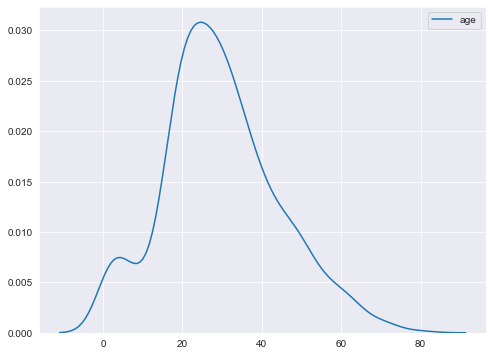

In [5]:
# Plotting a kernel density plot for the unscaled age column

sns.kdeplot(titanic_data["age"])

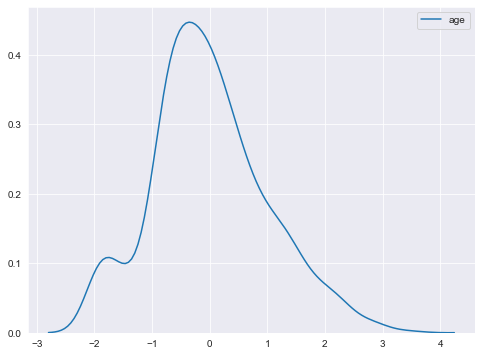

In [6]:
# Plotting a kernel density plot for the scaled age column

sns.kdeplot(titanic_data_scaled["age"])

In [7]:
# These two plots show that data scaling doesn't affect the default distribution of the data

# Min/Max Scaling

In [8]:
#Performing min/max scaling on the titanic dataset's age, fare, and pclass columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [9]:
#Creating a dataframe of the scaled columns and displys the first five rows of the scaled dataset

titanic_data_scaled = pd.DataFrame(titanic_data_scaled,columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0


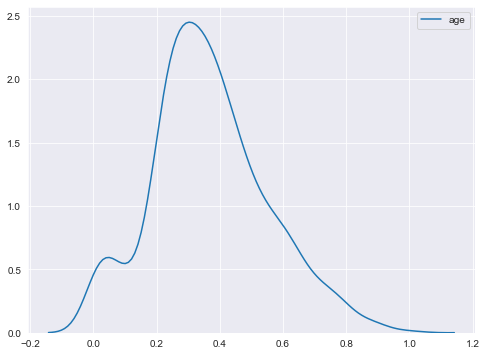

In [10]:
#Plotting the kernel density plot of the scaled data age column

sns.kdeplot(titanic_data_scaled["age"])

In [11]:
# The plot shows that min/max scaling doesn't change the data distribution of the dataset

# Mean Normalization

In [12]:
# Calculating the mean values for all the columns

mean_vals = titanic_data.mean(axis=0)

mean_vals

age       29.699118
fare      32.204208
pclass     2.308642
dtype: float64

In [13]:
#Finding the difference between the min and max values

range_vals = titanic_data.max(axis=0) - titanic_data.min(axis=0)

range_vals

age        79.5800
fare      512.3292
pclass      2.0000
dtype: float64

In [14]:
# Applies mean normalization to the complete dataset

titanic_data_scaled = (titanic_data-mean_vals)/range_vals

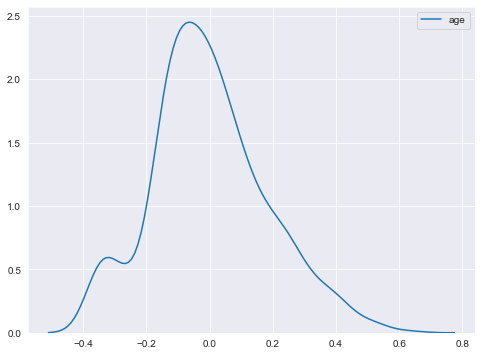

In [15]:
#Plotting a kernel density plot to see if the data distribution has been affected or not.

sns.kdeplot(titanic_data_scaled["age"])

In [16]:
# Plot shows that the data distribution has not been affected 

# Maximum Absolute Scaling

In [17]:
#Applying maximum absolute scaling on age, fare and pclass

from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [19]:
#Creating a dataframe of the scaled columns

titanic_data_scaled = pd.DataFrame(titanic_data_scaled,columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.2750,0.014151,1.000000
1,0.4750,0.139136,0.333333
2,0.3250,0.015469,1.000000
3,0.4375,0.103644,0.333333
4,0.4375,0.015713,1.000000


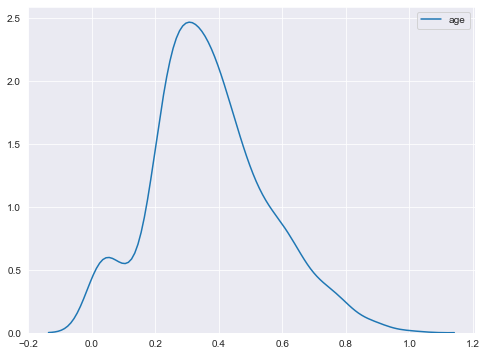

In [20]:
#Plotting the kernel density plot to see if the data distribution has been affected by absolute max scaling or not

sns.kdeplot(titanic_data_scaled["age"])

# Median and Quantile Scaling

In [21]:
# Applying median and quantile scaling on the age, fare and pclass columns

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(titanic_data)


titanic_data_scaled = scaler.transform(titanic_data)

In [22]:
#Creating a dataframe of the scaled columns

titanic_data_scaled = pd.DataFrame(titanic_data_scaled,columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.335664,-0.312011,0.0
1,0.559441,2.461242,-2.0
2,-0.111888,-0.282777,0.0
3,0.391608,1.673732,-2.0
4,0.391608,-0.277363,0.0


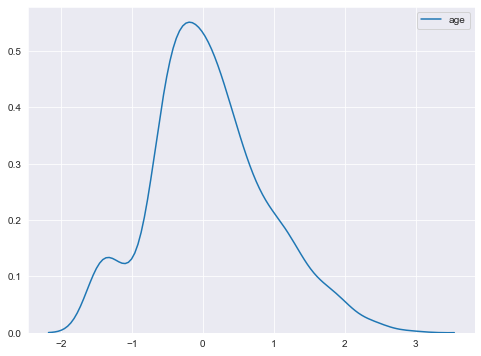

In [23]:
#Plotting the kernel density plot to see if the data distribution has been affected by median and quantile scaling or not

sns.kdeplot(titanic_data_scaled["age"])

# Vector Unit Length Scaling

In [24]:
# Applying vector unit length scaling with Manhattan distance on age, fare, and pclass columns

from sklearn.preprocessing import Normalizer

titanic_data.dropna(inplace=True)
scaler = Normalizer(norm = "l1")
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [25]:
#Creating a dataframe of the scaled columns

titanic_data_scaled = pd.DataFrame(titanic_data_scaled,columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.682171,0.224806,0.093023
1,0.344567,0.646365,0.009068
2,0.704130,0.214624,0.081246
3,0.392817,0.595960,0.011223
4,0.760043,0.174810,0.065147


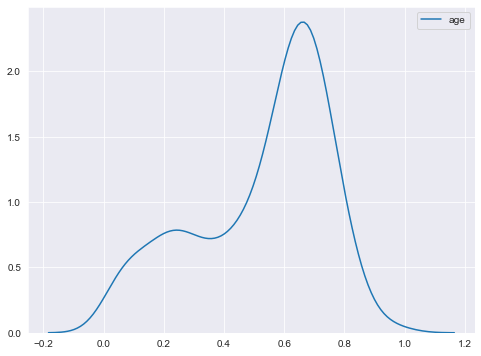

In [26]:
#Plotting the kernel density plot to see if the data distribution has been affected by vector unit length scaling or not

sns.kdeplot(titanic_data_scaled["age"])

In [27]:
#The plot shows that vector unit length scaling does change the data distribution 